In [20]:
from scipy import stats
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.proportion import binom_test
import sys
sys.path.append(os.path.abspath("../../../../"))
import Constants as c
import Utilities as utils
import statistics 

In [21]:
module_roi = "../../06_21_2020/ESP/esp_measures_Module.csv"
line_roi = "../../06_21_2020/ESP/esp_measures_Line.csv"

df_module = pd.read_csv(module_roi)
df_line = pd.read_csv(line_roi)

df = df_module.join(df_line.set_index(c.PROJECT), on=c.PROJECT, rsuffix='_LINE')
variance_df = df[["Annualized_ESP", "Annualized_ESP_LINE"]]
variance_df.head(25)

,Annualized_ESP,Annualized_ESP_LINE
0,-0.044,-0.512
1,-0.547,-0.676
2,1.329,-0.632
3,0.913,0.146
4,2.132,9.367
5,0.124,-0.508
6,-0.588,-0.256
7,2.161,2.421
8,0.091,0.205
9,-0.342,-0.395


In [22]:
variance_df["ESP_VARIANCE"] = variance_df.var(axis=1)
variance_df.head()

,Annualized_ESP,Annualized_ESP_LINE,ESP_VARIANCE
0,-0.044,-0.512,0.109512
1,-0.547,-0.676,0.008320
2,1.329,-0.632,1.922760
3,0.913,0.146,0.294144
4,2.132,9.367,26.172613


In [23]:
df["ESP_VARIANCE"] = variance_df["ESP_VARIANCE"]

In [24]:
greater_than_4 = df[df["ESP_VARIANCE"] > .04].sort_values(by="Project")
print(len(greater_than_4))

36


In [25]:
greater_than_4["Project"].head(34)

59            AutoMapper
16                  brew
20         cf-deployment
18                cinder
0                    cli
24                    d3
51                   dat
32                devise
21         elasticsearch
60                   fpm
44    generator-jhipster
19              gitlabhq
12        home-assistant
33                  jest
47                 jsdom
29           json-server
45                 karma
58              keystone
17            kubernetes
28                 linux
14                  lock
53             middleman
6                   moby
40              mongoose
4                neutron
22             office-js
15                 react
26              requests
3                 roslyn
23             socket.io
39            swagger-ui
48              systemjs
2             tensorflow
34              video.js
Name: Project, dtype: object

In [26]:
less_than_equal_to_4 = df[df["ESP_VARIANCE"] <= .04].sort_values(by="Project")
print(len(less_than_equal_to_4))

28


In [27]:
less_than_equal_to_4["Project"].head(30)

62              Odin
8            angular
10        angular.js
7            ansible
43      browser-sync
55           core-js
54           fluentd
25            jekyll
31            lodash
57            mathjs
37     medium-editor
13             mesos
63           natural
50    ng-file-upload
49        nightwatch
52           nixpkgs
9               node
11              nova
42               npm
1            orleans
38            pandoc
30               pm2
61            pomelo
41          selenium
46            stylus
36        superagent
56              vega
27           webpack
Name: Project, dtype: object

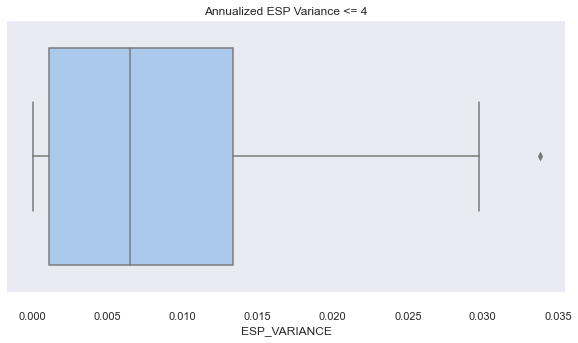

In [28]:
fig = plt.figure(figsize=(10,5))
plt.tight_layout()
sb.set(style="dark", palette="pastel")
ax = sb.boxplot(x="ESP_VARIANCE", data=less_than_equal_to_4)
ax.set_title('Annualized ESP Variance <= 4')
sb.despine(offset=10, trim=True)
plt.show()

In [29]:
print("Annualized ESP Variance <= 4 Mean: {0}".format(less_than_equal_to_4["ESP_VARIANCE"].mean()))
print("Annualized ESP Variance <= 4 Min: {0}".format(less_than_equal_to_4["ESP_VARIANCE"].min()))
print("Annualized ESP Variance <= 4 Max: {0}".format(less_than_equal_to_4["ESP_VARIANCE"].max()))

Annualized ESP Variance <= 4 Mean: 0.008856446428571427
Annualized ESP Variance <= 4 Min: 0.0
Annualized ESP Variance <= 4 Max: 0.03379999999999994


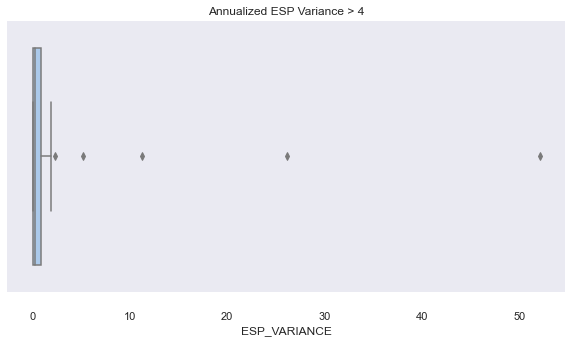

In [30]:
fig = plt.figure(figsize=(10,5))
plt.tight_layout()
sb.set(style="dark", palette="pastel")
ax = sb.boxplot(x="ESP_VARIANCE", data=greater_than_4)
ax.set_title('Annualized ESP Variance > 4')
sb.despine(offset=10, trim=True)
plt.show()

In [31]:
print("Annualized ESP Variance > 4 Mean: {0}".format(greater_than_4["ESP_VARIANCE"].mean()))
print("Annualized ESP Variance > 4 Min: {0}".format(greater_than_4["ESP_VARIANCE"].min()))
print("Annualized ESP Variance > 4 Max: {0}".format(greater_than_4["ESP_VARIANCE"].max()))

Annualized ESP Variance > 4 Mean: 3.063186916666667
Annualized ESP Variance > 4 Min: 0.042340500000000045
Annualized ESP Variance > 4 Max: 52.040402000000014


In [32]:
greater_than_4_no_outliers = df[df["ESP_VARIANCE"] > 4]
greater_than_4_no_outliers.head()

,Project,Model,Effort_Incurred,Effort_Saved,Net_Effort_Saved,ESP,Annualized_ESP,Model_LINE,Effort_Incurred_LINE,Effort_Saved_LINE,Net_Effort_Saved_LINE,ESP_LINE,Annualized_ESP_LINE,ESP_VARIANCE
4,neutron,Module,4571.00,140420.30,135849.30,29.720,2.132,Line,4876.00,5432337.69,5427461.69,1113.097,9.367,26.172613
34,video.js,Module,1991.13,344185.40,342194.27,171.859,4.571,Line,188571.48,2424185.40,2235613.92,11.856,1.343,5.209992
39,swagger-ui,Module,1420.95,24322.59,22901.64,16.117,1.577,Line,10699.32,22329572.54,22318873.22,2086.009,11.779,52.040402
51,dat,Module,868.66,152131.95,151263.29,174.134,4.595,Line,5502.91,6070256.76,6064753.85,1102.099,9.332,11.219585


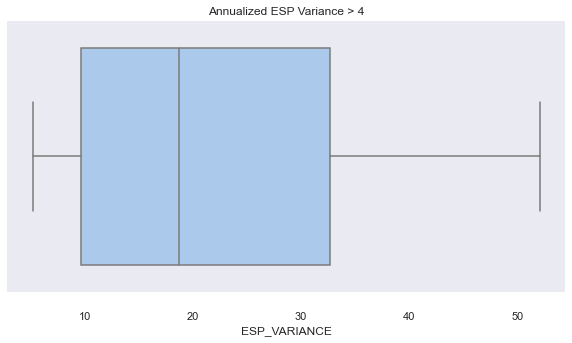

In [33]:
fig = plt.figure(figsize=(10,5))
plt.tight_layout()
sb.set(style="dark", palette="pastel")
ax = sb.boxplot(x="ESP_VARIANCE", data=greater_than_4_no_outliers)
ax.set_title('Annualized ESP Variance > 4')
sb.despine(offset=10, trim=True)
plt.show()

In [34]:
print("Annualized ESP Variance > 4 Mean: {0}".format(greater_than_4_no_outliers["ESP_VARIANCE"].mean()))
print("Annualized ESP Variance > 4 Min: {0}".format(greater_than_4_no_outliers["ESP_VARIANCE"].min()))
print("Annualized ESP Variance > 4 Max: {0}".format(greater_than_4_no_outliers["ESP_VARIANCE"].max()))

Annualized ESP Variance > 4 Mean: 23.66064775000001
Annualized ESP Variance > 4 Min: 5.2099920000000015
Annualized ESP Variance > 4 Max: 52.040402000000014


In [35]:
count = len(less_than_equal_to_4.values)
nobs = len(df["ESP_VARIANCE"].values)
prop = .50
alternative = 'greater'
print(count)
print(nobs)
print(prop)

28
64
0.5


In [36]:
# Test if central limit theorem kicks in
# https://cran.r-project.org/web/packages/distributions3/vignettes/one-sample-z-test-for-proportion.html
# https://www.khanacademy.org/math/ap-statistics/estimating-confidence-ap/one-sample-z-interval-proportion/a/conditions-inference-one-proportion
n = nobs
p = count/nobs
print((n*p) > 5)
print((n*(1-p)) > 5)

True
True


In [37]:
stat, pvalue = proportions_ztest(count, nobs, prop, alternative='smaller')
print('{0:0.5f}'.format(pvalue))

0.15675


In [38]:
pvalue = binom_test(count, nobs, prop, alternative='smaller')
print('{0:0.5f}'.format(pvalue))

0.19087
